- 什么时候winsorize：只有到分析那一步才winsorize，避免信息过早丢失
- f'{RD}price'中f的意义
- for f in os.listdir(f'{RD}price') if pd in f)的运行顺序
- 为什么只取了2019-2020的数据
- 为什么安全起见用的5
- dataframe里面index是唯一的么

<p style="font-size:200%;font-weight:bold"> Data Integration & Cleaning </p>

- Author: Yichen Luo
- Date: 2022-03-09

In [1]:
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.options.mode.chained_assignment = None
os.getcwd()

RD = '/home/team_crypto/2022_crypto_return/03_wdata/1100_coingecko/price/'
WD = '/home/team_crypto/2022_crypto_return/03_wdata/1100_coingecko/'

In [22]:
done = set([f.replace('.pq','') for f in os.listdir(f'{RD}') if 'pq' in f])
len(done)
#set没有index

12649

In [23]:
sample = pd.read_parquet(f'{RD}01coin.pq')
sample

,time,prices,market_caps,total_volumes,id,symbol,name
0,2018-09-15,0.009788,30917.331417,103.397128,01coin,zoc,01coin
1,2018-09-16,0.009883,31330.589618,94.514808,01coin,zoc,01coin
2,2018-09-17,0.012145,38704.857566,307.498611,01coin,zoc,01coin
3,2018-09-18,0.007965,25529.340752,340.808326,01coin,zoc,01coin
4,2018-09-19,0.011866,38156.742601,166.514620,01coin,zoc,01coin
...,...,...,...,...,...,...,...
1266,2022-03-05,0.000627,0.000000,21.663934,01coin,zoc,01coin
1267,2022-03-06,0.000631,0.000000,0.873876,01coin,zoc,01coin
1268,2022-03-07,0.000615,0.000000,0.718032,01coin,zoc,01coin
1269,2022-03-08,0.000613,0.000000,1.204119,01coin,zoc,01coin


# Data Intergration

In [24]:
#done = ['01coin','0cash']

In [25]:
dfs=[]

for idx in done:
    df = pd.read_parquet(f'{RD}/{idx}.pq')
    #df.set_index('time', inplace=True)
    dfs.append(df)

dfm = pd.concat(dfs)
#dfm.reset_index(inplace = True)
dfm.shape
dfm.head(5)

(5183377, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
0,2022-01-28,3.462893e-10,0.0,2.292543e+06,champinu,champinu,ChampInu
1,2022-01-29,3.462893e-10,0.0,2.292543e+06,champinu,champinu,ChampInu
2,2022-01-30,2.571027e-10,0.0,1.790715e+05,champinu,champinu,ChampInu
3,2022-01-31,2.301001e-10,0.0,3.425750e+04,champinu,champinu,ChampInu
4,2022-02-01,1.993979e-10,0.0,1.821108e+04,champinu,champinu,ChampInu


In [26]:
dfm['id'].value_counts()

ripple                 2990
litecoin               2989
primecoin              2989
namecoin               2989
peercoin               2989
                       ... 
rhinos-game               2
collectcoin               2
meta-uranus               2
blockchain-protocol       2
ubiquity                  2
Name: id, Length: 12649, dtype: int64

In [27]:
dfm.to_parquet(f'{WD}crypto.pq')

# Read File

In [73]:
dfm = pd.read_parquet(f'{WD}crypto.pq')
dfm.shape
dfm.head()

(5183377, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
0,2022-01-28,3.462893e-10,0.0,2.292543e+06,champinu,champinu,ChampInu
1,2022-01-29,3.462893e-10,0.0,2.292543e+06,champinu,champinu,ChampInu
2,2022-01-30,2.571027e-10,0.0,1.790715e+05,champinu,champinu,ChampInu
3,2022-01-31,2.301001e-10,0.0,3.425750e+04,champinu,champinu,ChampInu
4,2022-02-01,1.993979e-10,0.0,1.821108e+04,champinu,champinu,ChampInu


# Converting daily data to weekly data

In [74]:
dfm['yw'] = dfm['time'].dt.year * 100 + dfm['time'].dt.isocalendar().week
#查代码的时候要注意把一条语句分为最基本的函数

In [75]:
dfm['time'].nunique()
dfm.sort_values(['id', 'time'], ascending=True, inplace=True)
dfm.drop_duplicates(subset=['id', 'yw'], keep='last', inplace=True)
dfm
dfm['time'].nunique()

4130

,time,prices,market_caps,total_volumes,id,symbol,name,yw
5,2020-08-23,11086.451335,0.000000,29.046502,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202034
6,2020-09-06,9147.461686,0.000000,632.455501,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202036
8,2020-09-08,8892.703764,0.000000,614.841538,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202037
12,2020-11-01,7521.017971,0.000000,232.324245,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202044
16,2020-11-07,7449.022946,0.000000,10.130671,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202045
...,...,...,...,...,...,...,...,...
216,2022-01-02,2.037843,40756.869447,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202252
218,2022-01-30,1.314470,26244.791164,217.172436,zzz-finance-v2,zzzv2,zzz.finance v2,202204
219,2022-01-31,1.314470,26289.407949,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202205
223,2022-02-27,1.307593,26151.864866,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202208


1709

In [76]:
dfm.loc[dfm['id'] == 'bitcoin']

,time,prices,market_caps,total_volumes,id,symbol,name,yw
11,2014-01-12,867.450000,1.063019e+10,4.017110e+07,bitcoin,btc,Bitcoin,201402
18,2014-01-19,838.170000,1.029334e+10,1.757410e+07,bitcoin,btc,Bitcoin,201403
25,2014-01-26,853.510000,1.050880e+10,2.267680e+07,bitcoin,btc,Bitcoin,201404
32,2014-02-02,836.410000,1.032366e+10,1.934760e+07,bitcoin,btc,Bitcoin,201405
39,2014-02-09,672.070000,8.315657e+09,3.486440e+07,bitcoin,btc,Bitcoin,201406
...,...,...,...,...,...,...,...,...
2964,2022-02-13,42254.738123,7.995475e+11,1.547973e+10,bitcoin,btc,Bitcoin,202206
2971,2022-02-20,40192.759121,7.614472e+11,1.173518e+10,bitcoin,btc,Bitcoin,202207
2978,2022-02-27,39090.202154,7.410836e+11,1.456820e+10,bitcoin,btc,Bitcoin,202208
2985,2022-03-06,39463.146811,7.481972e+11,1.481821e+10,bitcoin,btc,Bitcoin,202209


# Return & Market Value

In [77]:
dfm.sort_values(['id', 'yw'], ascending=True, inplace=True)
dfm['ret'] = dfm.groupby(['id'])['prices'].pct_change()
dfm['mv_l1'] = dfm.groupby(['id'])['market_caps'].shift()
dfm

,time,prices,market_caps,total_volumes,id,symbol,name,yw,ret,mv_l1
5,2020-08-23,11086.451335,0.000000,29.046502,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202034,NaN,NaN
6,2020-09-06,9147.461686,0.000000,632.455501,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202036,-0.174897,0.000000
8,2020-09-08,8892.703764,0.000000,614.841538,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202037,-0.027850,0.000000
12,2020-11-01,7521.017971,0.000000,232.324245,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202044,-0.154248,0.000000
16,2020-11-07,7449.022946,0.000000,10.130671,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202045,-0.009573,0.000000
...,...,...,...,...,...,...,...,...,...,...
218,2022-01-30,1.314470,26244.791164,217.172436,zzz-finance-v2,zzzv2,zzz.finance v2,202204,-0.396700,43575.996211
219,2022-01-31,1.314470,26289.407949,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202205,0.000000,26244.791164
223,2022-02-27,1.307593,26151.864866,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202208,-0.005232,26289.407949
226,2022-03-06,1.299935,25998.697304,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202209,-0.005857,26151.864866


## Data Cleaning

### Market Capitalization less than 1,000,000 dollar

In [78]:
dfm['id'].nunique()

th = dfm.copy()
th['threshold'] = th['market_caps'] >= 1000000
th = th.groupby(['id'], as_index=False)['threshold'].sum()
th['threshold'].value_counts()

dfm = dfm.merge(th, on='id', how='left', validate='m:1', indicator=True)
dfm['_merge'].value_counts()
dfm.drop(columns=['_merge'], inplace=True)
dfm

dfm = dfm.loc[dfm['threshold'] > 0]
dfm['id'].nunique()

12649

0      8873
1        97
3        87
7        82
2        72
       ... 
349       1
296       1
347       1
247       1
271       1
Name: threshold, Length: 302, dtype: int64

both          796540
left_only          0
right_only         0
Name: _merge, dtype: int64

,time,prices,market_caps,total_volumes,id,symbol,name,yw,ret,mv_l1,threshold
0,2020-08-23,11086.451335,0.000000,29.046502,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202034,NaN,NaN,0
1,2020-09-06,9147.461686,0.000000,632.455501,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202036,-0.174897,0.000000,0
2,2020-09-08,8892.703764,0.000000,614.841538,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202037,-0.027850,0.000000,0
3,2020-11-01,7521.017971,0.000000,232.324245,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202044,-0.154248,0.000000,0
4,2020-11-07,7449.022946,0.000000,10.130671,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token,202045,-0.009573,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
796535,2022-01-30,1.314470,26244.791164,217.172436,zzz-finance-v2,zzzv2,zzz.finance v2,202204,-0.396700,43575.996211,0
796536,2022-01-31,1.314470,26289.407949,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202205,0.000000,26244.791164,0
796537,2022-02-27,1.307593,26151.864866,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202208,-0.005232,26289.407949,0
796538,2022-03-06,1.299935,25998.697304,0.000000,zzz-finance-v2,zzzv2,zzz.finance v2,202209,-0.005857,26151.864866,0


3776

### Winsorize

,ret,retw
count,4.149160e+05,414916.000000
mean,inf,0.084801
std,NaN,0.604300
min,-5.199726e+10,-0.753546
25%,-1.369415e-01,-0.136942
50%,-1.208999e-02,-0.012090
75%,1.170224e-01,0.117022
max,inf,4.351554


<AxesSubplot:>

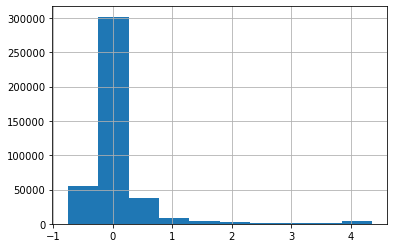

In [79]:
dfm['retw'] = dfm['ret']
dfm.loc[dfm['ret'] <= dfm['ret'].quantile(0.01), 'retw'] = dfm['ret'].quantile(0.01)
dfm.loc[dfm['ret'] >= dfm['ret'].quantile(0.99), 'retw'] = dfm['ret'].quantile(0.99)
dfm[['ret', 'retw']].describe()
dfm['retw'].hist()

## Market

In [80]:
mret = dfm.copy()
mret['retw'] *= mret['mv_l1']
mret = mret.groupby(['yw'], as_index=False)[['retw', 'mv_l1', 'market_caps']].sum()
mret['mret'] = mret['retw'] / mret['mv_l1']
mret['mcap'] = mret['market_caps']
mret.drop(columns = ['retw', 'mv_l1', 'market_caps'], inplace=True)
mret.head()
mret.tail()

dfm = dfm.merge(mret, on=['yw'], how='left', validate='m:1', indicator=True)
dfm['_merge'].value_counts()
dfm = dfm.loc[dfm['_merge'] == 'both'].copy()
dfm.drop(columns=['_merge'], inplace=True)
dfm.head()

,yw,mret,mcap
0,201401,NaN,5.382938e+09
1,201402,1.530599,1.187620e+10
2,201403,-0.033793,1.150697e+10
3,201404,0.016939,1.174855e+10
4,201405,-0.022032,1.152847e+10


,yw,mret,mcap
426,202207,-0.042490,1.901943e+12
427,202208,-0.025045,1.857110e+12
428,202209,-0.004190,1.854865e+12
429,202210,-0.027936,1.807747e+12
430,202252,0.359519,2.381520e+12


both          418698
left_only          0
right_only         0
Name: _merge, dtype: int64

,time,prices,market_caps,total_volumes,id,symbol,name,yw,ret,mv_l1,threshold,retw,mret,mcap
0,2018-12-31,0.084721,3.388830e+06,20941.419504,0chain,zcn,0chain,201801,NaN,NaN,190,NaN,-0.741223,1.314615e+11
1,2018-07-22,0.377234,1.508935e+07,62006.348324,0chain,zcn,0chain,201829,3.452674,3.388830e+06,190,3.452674,0.126482,2.837350e+11
2,2018-07-29,0.385928,1.543713e+07,31060.725051,0chain,zcn,0chain,201830,0.023047,1.508935e+07,190,0.023047,0.057922,3.007103e+11
3,2018-08-05,0.234256,9.370222e+06,28971.530712,0chain,zcn,0chain,201831,-0.393007,1.543713e+07,190,-0.393007,-0.149606,2.558770e+11
4,2018-08-12,0.156194,6.247776e+06,39812.569755,0chain,zcn,0chain,201832,-0.333231,9.370222e+06,190,-0.333231,-0.171618,2.134935e+11


count    430.000000
mean       0.025753
std        0.220351
min       -0.741223
25%       -0.037488
50%        0.010629
75%        0.071935
max        3.289350
Name: mret, dtype: float64

<AxesSubplot:>

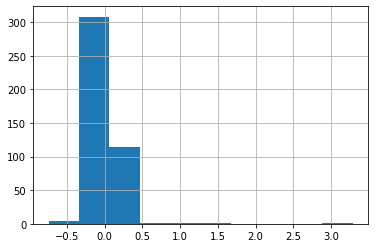

In [81]:
mret['mret'].describe()
mret['mret'].hist()

## Summary Statistics 

In [82]:
dfm['year'] = dfm['time'].dt.year

for yr in range(2014, 2019):
    dfy = dfm.loc[dfm['year'] == yr]
    print(yr,
          dfy['id'].nunique(),
          dfy['market_caps'].mean() / 1000000,
          dfy['market_caps'].median() / 1000000,
          dfy['total_volumes'].mean() / 1000,
          dfy['total_volumes'].median() / 1000
)

dfy = dfm.loc[dfm['id'] == 'bitcoin']
dfy = dfy.loc[dfy['year'].between(2014,2018)]
print( 'bitcoin', 
       dfy['ret'].mean(),
       dfy['ret'].median(),
       dfy['ret'].std(),
       dfy['ret'].skew(),
       dfy['ret'].kurtosis() 
)

dfy = dfm.loc[dfm['id'] == 'ripple']
dfy = dfy.loc[dfy['year'].between(2014,2018)]
print( 'ripple', 
       dfy['ret'].mean(),
       dfy['ret'].median(),
       dfy['ret'].std(),
       dfy['ret'].skew(),
       dfy['ret'].kurtosis() 
)

dfy = dfm.loc[dfm['id'] == 'ethereum']
dfy = dfy.loc[dfy['year'].between(2014,2018)]
print( 'ethereum', 
       dfy['ret'].mean(),
       dfy['ret'].median(),
       dfy['ret'].std(),
       dfy['ret'].skew(),
       dfy['ret'].kurtosis() 
)

2014 110 94.8147547311792 0.2929438776178284 490.3030587947172 1.6028691897539236
2015 141 35.62300290016119 0.14012876886892947 2234.07092765169 0.3028898581744091
2016 180 72.6668786915238 0.37841831815819865 13598.034382193402 0.9488338848472082
2017 477 537.7072571505939 5.85819384592 14791.612548806532 50.505275934149175
2018 1164 334.86931385736716 5.202424514623048 13365.501528603234 58.41025000134692
bitcoin 0.028471259537987806 0.009083136755656973 0.24697827570699896 6.899470816929386 70.41926454464553
ripple 0.05662411128017187 -0.012816855740871325 0.46326458244408936 7.160654938489308 63.50707854946556
ethereum 0.13612500739368338 0.003715960426264875 1.0167768554510888 8.648132756149758 77.76339046239146


### Bitcoin

<AxesSubplot:xlabel='time'>

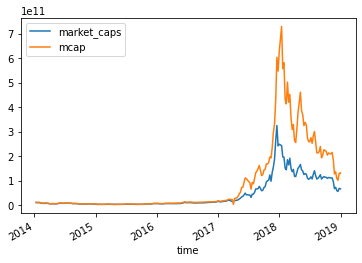

In [83]:
dfy = dfm.loc[dfm['id'] == 'bitcoin']
dfy = dfy.loc[dfy['year'].between(2014,2018)]
dfy.set_index('time', inplace=True)
dfy[['market_caps', 'mcap']].plot()

### Ripple

<AxesSubplot:xlabel='time'>

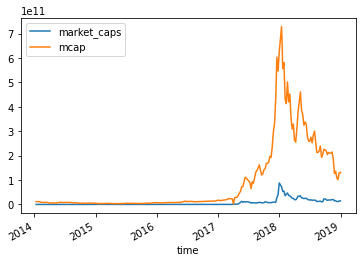

In [84]:
dfy = dfm.loc[dfm['id'] == 'ripple']
dfy = dfy.loc[dfy['year'].between(2014,2018)]
dfy.set_index('time', inplace=True)
dfy[['market_caps', 'mcap']].plot()

### Ethereum

<AxesSubplot:xlabel='time'>

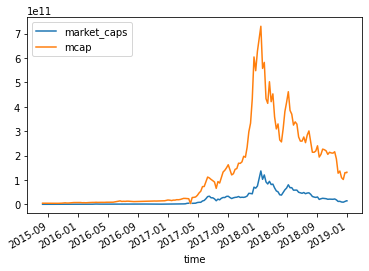

In [85]:
dfy = dfm.loc[dfm['id'] == 'ethereum']
dfy = dfy.loc[dfy['year'].between(2014,2018)]
dfy.set_index('time', inplace=True)
dfy[['market_caps', 'mcap']].plot()